# $\mathrm{Co_3O_4}$  Project EQCM

## Analyze Cyclic Voltammetry Acquired After EQCM and EIS

### Load CV Data

In [1]:
import numpy as np
import pandas as pd
from galvani import BioLogic
import os

def load_data(file) -> tuple[np.ndarray[float], np.ndarray[float]]:
    global data
    mpr_file = BioLogic.MPRfile(file)
    data = pd.DataFrame(mpr_file.data)
    data.to_csv(f'{file[:-4]}.txt', sep = '\t')
    #print(data.head())
    time       = data['time/s']-data['time/s'].iloc[0]
    potential  = pd.Series(data['Ewe/V'])
    current    = pd.Series(data['<I>/mA'])
    cycle      = pd.Series(data['cycle number'], name = 'cycle')
    fname      = pd.Series(np.full(np.shape(time), os.path.basename(file)), name = 'fname')
    return time, potential, current, cycle, fname





AllCVData = pd.DataFrame()
files = []
root = os.getcwd()
if __name__ == "__main__":
    for dirpath, dirnames, filenames in os.walk(root):
        for file in filenames:
            if file.endswith('.mpr') and file.__contains__('4_06_CV_C'):
                files.append(os.path.join(dirpath, file))
    for ifile, file in enumerate(files): 
        time, voltage, current, cycle, fname = load_data(file)
        CVData = pd.concat([time, voltage, current, cycle, fname], axis = 1)

        AllCVData = pd.concat([AllCVData, CVData])
    AllCVData_indexed = AllCVData.set_index(['fname'])
AllCVData_indexed.to_parquet('AllCVData_indexed.parquet')
AllCVData_indexed


time/s     Ewe/V  \
fname                                                                     
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...    0.00000  0.100211   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...    0.11990  0.100828   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...    0.32980  0.101863   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...    0.52970  0.102868   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...    0.72960  0.103879   
...                                                       ...       ...   
CL20250522_006_#6_Co3O4Nps_CVafter1h_CA_at_0p8V...  779.53158  0.102441   
CL20250522_006_#6_Co3O4Nps_CVafter1h_CA_at_0p8V...  779.73148  0.101456   
CL20250522_006_#6_Co3O4Nps_CVafter1h_CA_at_0p8V...  779.93138  0.100469   
CL20250522_006_#6_Co3O4Nps_CVafter1h_CA_at_0p8V...  780.06138  0.099828   
CL20250522_006_#6_Co3O4Nps_CVafter1h_CA_at_0p8V...  780.09698  0.099577   

                                                      <I>/mA  cycle  
fname                                                                
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s... -1.033425    1.0  
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s... -0.546646    1.0  
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s... -0.226722    1.0  
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s... -0.127231    1.0  
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s... -0.082184    1.0  
...                                                      ...    ...  
CL20250522_006_#6_Co3O4Nps_CVafter1h_CA_at_0p8V... -0.002110    3.0  
CL20250522_006_#6_Co3O4Nps_CVafter1h_CA_at_0p8V... -0.002034    3.0  
CL20250522_006_#6_Co3O4Nps_CVafter1h_CA_at_0p8V... -0.001950    3.0  
CL20250522_006_#6_Co3O4Nps_CVafter1h_CA_at_0p8V... -0.001905    3.0  
CL20250522_006_#6_Co3O4Nps_CVafter1h_CA_at_0p8V... -0.001930    3.0  

[11724 rows x 4 columns]

### Make an Interactive Plot

<>:57: SyntaxWarning: invalid escape sequence '\m'
<>:57: SyntaxWarning: invalid escape sequence '\m'
/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_1809/2803752562.py:57: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('$\mathrm{current \ density_{geo} \ (mA \ cm^{-1})}$', fontsize = 12)


0

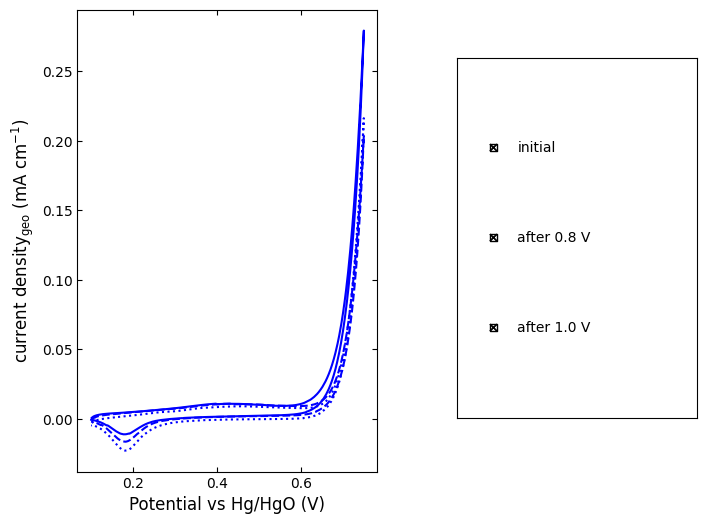

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import CheckButtons
from matplotlib.colors import LinearSegmentedColormap
import math

#%matplotlib widget

# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 6))
ax.tick_params(which='both', direction='in', bottom=True, left=True, right=True, top=True)
lines = []

# Define color map
cm_bright = LinearSegmentedColormap.from_list("custom", ["#F50808", "#0000FF"])

# Gather all unique sample names and perturbations
samples = set(AllCVData_indexed.index.get_level_values('fname'))

label_map = {}
n_cycle = 3
# Plot data by sample and perturbation
for i_sample, sample in enumerate(samples):
    try:
        df = AllCVData_indexed.loc[(sample)]
        df = df[df['cycle'] == n_cycle]
        linestyle = '-'
        info = ''
        if 'initial' in sample:
            info = 'initial'
            linestyle = ':'
        elif '_at_0' in sample:
            linestyle = '--'
            info = 'after 0.8 V'
        elif '_at_1' in sample:
            linestyle = '-'
            info = 'after 1.0 V'

        full_label = f'{info}'
        color = 'blue'

        line = ax.plot(
            df['Ewe/V'].to_numpy()[2:],
            df['<I>/mA'].to_numpy()[2:],
            label=full_label,
            linestyle=linestyle,
            color=color
        )[0]

        label_map.setdefault(full_label, []).append(line)

    except KeyError:
        continue

# Axis labels
ax.set_xlabel('Potential vs Hg/HgO (V)', fontsize = 12)
ax.set_ylabel('$\mathrm{current \ density_{geo} \ (mA \ cm^{-1})}$', fontsize = 12)

# Prepare CheckButtons
labels = list(label_map.keys())
visibility = [all(line.get_visible() for line in group) for group in label_map.values()]

# Add axes for checkboxes
rax = plt.axes([0.6, 0.2, 0.3, 0.6])  # Adjust position as needed
check = CheckButtons(rax, labels, visibility)

# Define callback function
def toggle_visibility(label):
    for line in label_map[label]:
        visible = not line.get_visible()
        line.set_visible(visible)
    plt.draw()

plt.subplots_adjust(right=0.5)
check.on_clicked(toggle_visibility)


## Make Differential Tafel Plot

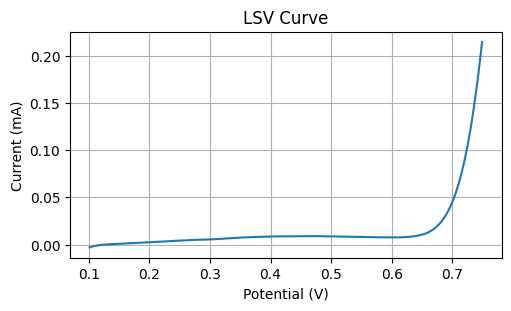

Tafel slope (order 0): 67.33+/-0.05 mV/dec
Tafel slope (order 1): 66.67+/-0.46 mV/dec
Tafel slope (order 2): 87.00+/-0.77 mV/dec
Tafel slope (order 3): 214.22+/-50.24 mV/dec


/opt/homebrew/anaconda3/lib/python3.12/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


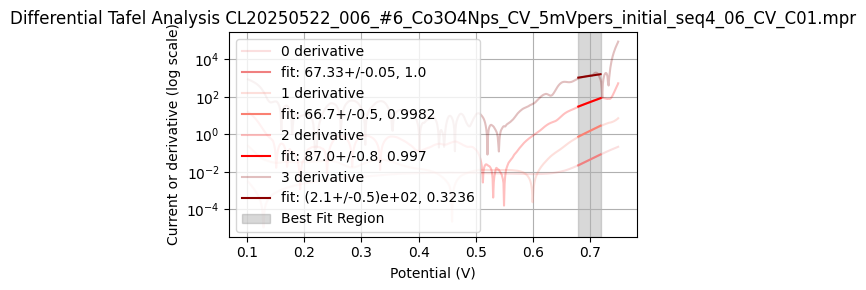

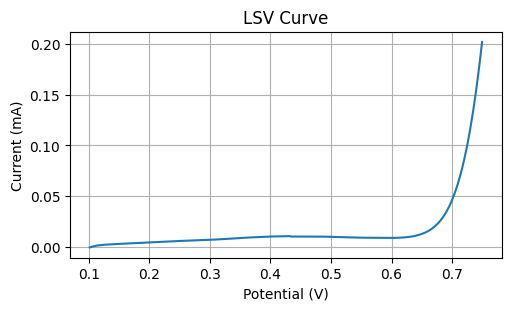

Tafel slope (order 0): 75.27+/-0.14 mV/dec
Tafel slope (order 1): 70.46+/-0.41 mV/dec
Tafel slope (order 2): 88.95+/-0.70 mV/dec
Tafel slope (order 3): 214.42+/-38.35 mV/dec


/opt/homebrew/anaconda3/lib/python3.12/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


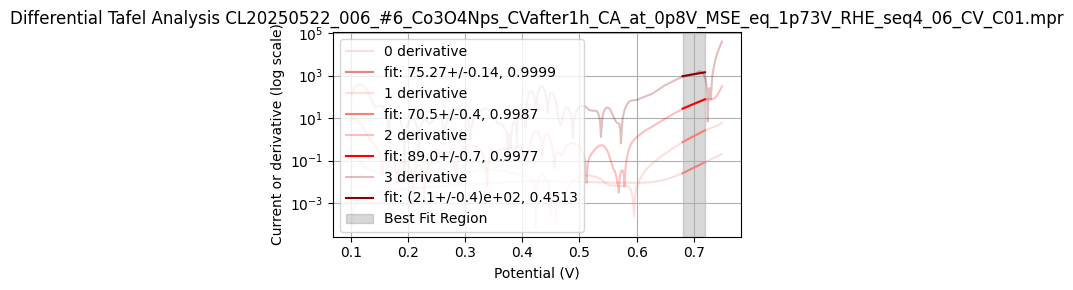

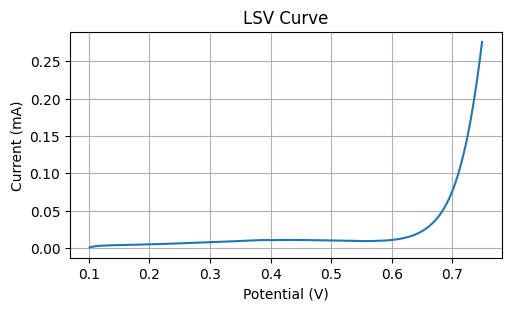

Tafel slope (order 0): 86.45+/-0.14 mV/dec
Tafel slope (order 1): 81.02+/-0.27 mV/dec
Tafel slope (order 2): 93.64+/-1.51 mV/dec
Tafel slope (order 3): 339.08+/-56.18 mV/dec


/opt/homebrew/anaconda3/lib/python3.12/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


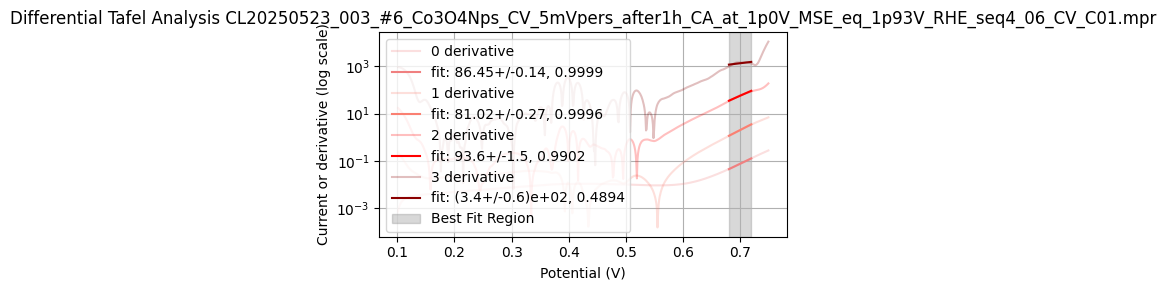

In [3]:
import os
import pandas as pd
from galvani import BioLogic
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import CheckButtons
from matplotlib.colors import LinearSegmentedColormap
from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from lmfit.models import LinearModel
from uncertainties import ufloat


colors = ['lightcoral', 'salmon', 'red', 'darkred']

def lmfit_slope_stats(potential_segment, log_data_segment):
    """Fit a line using lmfit LinearModel and return slope, slope error, and R²."""
    model = LinearModel()
    params = model.make_params(intercept=0, slope=1)
    result = model.fit(log_data_segment, params, x=potential_segment)
    slope = result.params['slope'].value
    slope_error = result.params['slope'].stderr
    r_squared = result.rsquared
    fit = 10**result.best_fit
    return slope, slope_error, r_squared, fit



def find_best_linear_region(E, Y, window_size=20):
    log_Y = np.log10(np.abs(Y))
    best_r2 = -np.inf
    best_range = (0, window_size)
    for i in range(len(E) - window_size):
        E_window = E[i:i + window_size].reshape(-1, 1)
        Y_window = log_Y[i:i + window_size]
        model = LinearRegression().fit(E_window, Y_window)
        r2 = r2_score(Y_window, model.predict(E_window))
        if r2 > best_r2:
            best_r2 = r2
            best_range = (i, i + window_size)
    return best_range, best_r2



def differential_tafel_analysis_iterative(potential, current_density, window_length=31, polyorder=3, threshold=0.05, max_order=3):
    current_derivatives = [savgol_filter(current_density, window_length, polyorder)]
    fits         = np.ones((len(current_density), max_order+1))*np.nan
    slopes       = []
    R2s          = []
    tafel_slopes = []
    for order in range(0, max_order + 1):
        if order >= len(current_derivatives):
            derivative = np.gradient(current_derivatives[order - 1], potential)
            smoothed = savgol_filter(derivative, window_length, polyorder)
            current_derivatives.append(smoothed)


    best_range, best_r2 = find_best_linear_region(potential, current_derivatives[2], window_size=30)
    #start, end = best_range
    start, end = np.argmin(np.abs(potential-0.68)), np.argmin(np.abs(potential-0.72))
        
    for order in range(0, max_order + 1):
        pot_fit = potential[start:end]
        log_fit = np.log10(np.abs(current_derivatives[order][start:end]))

        slope, slope_error, r_squared, fit = lmfit_slope_stats(potential_segment = pot_fit, log_data_segment = log_fit)
        slope_with_uncertainty = ufloat(slope, slope_error)
        tafel_slope = 1 / slope_with_uncertainty * 1000 #mV
        slopes.append(tafel_slope)
        R2s.append(np.round(r_squared, 4))
        fits[start:end, order] = fit
        print(f"Tafel slope (order {order}): {tafel_slope:.2f} mV/dec")
        tafel_slopes.append(tafel_slope)




    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(5, 3))
    for i in range(max_order + 1):  # Only plot up to max_order
        ax.semilogy(potential, np.abs(current_derivatives[i]), color = colors[i], label=f'{i} derivative', alpha = 0.25)
        ax.semilogy(potential[start:end], fits[start:end,i], color = colors[i], label=f'fit: {slopes[i]}, {R2s[i]}')
    ax.axvspan(potential[start], potential[end-1], color='gray', alpha=0.3, label='Best Fit Region')
    ax.set_xlabel('Potential (V)')
    ax.set_ylabel('Current or derivative (log scale)')
    ax.set_title(f'Differential Tafel Analysis {sample}')
    ax.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    overpotential = potential[np.argmin(np.abs((current_density-0.1)))]
    tafel_slopes.append(overpotential)
    tafel_slopes = pd.DataFrame([tafel_slopes], columns = ['tafel slope 0', 'tafel slope 1', 'tafel slope 2', 'tafel slope 3', 'overpotential'])
    return tafel_slopes



n_cycle = 3
results = pd.DataFrame() 
for i_sample, sample in enumerate(samples):
    df = AllCVData_indexed.loc[(sample)]
    df = df[df['cycle'] == n_cycle]
    len_anodic_wave = len(df['Ewe/V'])//2
    fig, ax = plt.subplots(nrows = 1, ncols = 1, constrained_layout = True, figsize = (5,3))     
    ax.plot(df['Ewe/V'].to_numpy()[2:len_anodic_wave],
                df['<I>/mA'].to_numpy()[2:len_anodic_wave])
    ax.set_xlabel("Potential (V)")
    ax.set_ylabel("Current (mA)")
    ax.set_title("LSV Curve")
    plt.grid(True)
    plt.show()
    tafel_slopes = differential_tafel_analysis_iterative(df['Ewe/V'].to_numpy()[2:len_anodic_wave], df['<I>/mA'].to_numpy()[2:len_anodic_wave])
    tafel_slopes.index = [os.path.basename(sample)]
    results = pd.concat([results, tafel_slopes])


                                                    tafel slope     error  \
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...    67.333172  0.054941   
CL20250522_006_#6_Co3O4Nps_CVafter1h_CA_at_0p8V...    75.266025  0.135410   
CL20250523_003_#6_Co3O4Nps_CV_5mVpers_after1h_C...    86.451327  0.143573   

                                                    overpotential  \
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...       0.723507   
CL20250522_006_#6_Co3O4Nps_CVafter1h_CA_at_0p8V...       0.724447   
CL20250523_003_#6_Co3O4Nps_CV_5mVpers_after1h_C...       0.710156   

                                                             info  
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...       Pristine  
CL20250522_006_#6_Co3O4Nps_CVafter1h_CA_at_0p8V...  1 h at 1.73 V  
CL20250523_003_#6_Co3O4Nps_CV_5mVpers_after1h_C...  1 h at 1.93 V  


<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_1809/1749067141.py:17: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Tafel slope $\mathrm{(mV \ dec^{-1})}$', fontsize = 12)


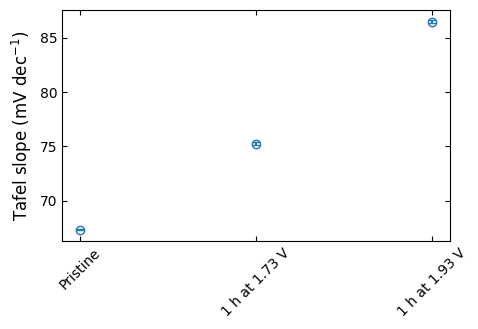

In [4]:
tafel_plot_data = pd.concat([results['tafel slope 0'].apply(lambda x: x.n), results['tafel slope 0'].apply(lambda x: x.s), results['overpotential']], axis = 1)
tafel_plot_data.columns = ['tafel slope', 'error', 'overpotential']
tafel_plot_data['info'] = tafel_plot_data.index.map(
    lambda idx: (
        'Pristine' if 'ini' in idx else
        '1 h at 1.73 V' if '0p8' in idx else
        '1 h at 1.93 V' if 'at_1' in idx else
        'unknown'
    )
)
tafel_plot_data = tafel_plot_data.sort_values(by='tafel slope', ascending=True)
print(tafel_plot_data)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize = (5,3))
ax.tick_params(which = 'both', direction = 'in', bottom = True, top = True, left = True, right = True)
ax.errorbar(tafel_plot_data['info'], tafel_plot_data['tafel slope'], tafel_plot_data['error'], linestyle = 'none', marker = 'o', capsize = 3, fillstyle = 'none')
ax.tick_params(axis = 'x', labelrotation = 45)
ax.set_ylabel('Tafel slope $\mathrm{(mV \ dec^{-1})}$', fontsize = 12)
plt.show()

## Analyze EQCM Data

### Load EQCM Data and Pstat Data

/Users/leppin/Documents/SYNC/People/Christian/Electroresponsivity_Co3O4/Folder_For_DataBase/FastEQCM-D/SmallLoadingRepeat1/pristine/2025-05-22 CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_seq1/CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_seq1_dfc_by_n.txt


/opt/homebrew/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


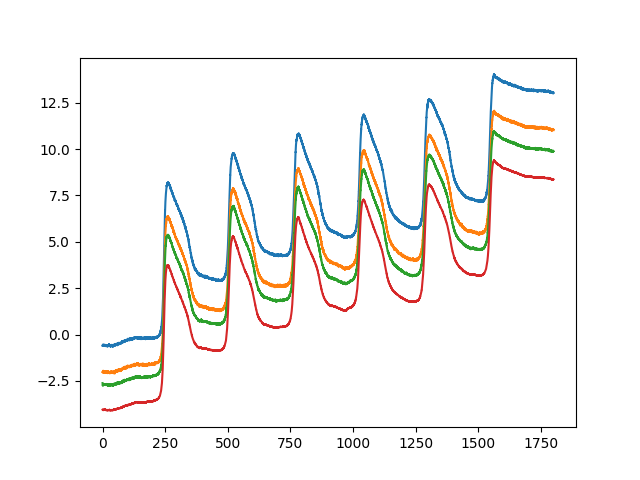

/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_1809/3993821204.py:46: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(master_fname, skiprows = 0, delimiter = "\t")


   flags      time/s  control/V     Ewe/V    <I>/mA  cycle number  \
0      2  234.394794   0.100010  0.099594 -0.002292           1.0   
1      2  234.504794   0.100560  0.100170 -0.001837           1.0   
2     18  234.704694   0.101559  0.101166 -0.001462           1.0   
3     22  234.904594   0.102559  0.102157 -0.001226           1.0   
4     22  235.104494   0.103558  0.103162 -0.001035           1.0   

       (Q-Qo)/C  I Range  Rcmp/Ohm  
0  0.000000e+00       39  8.499999  
1 -1.702640e-07       39  8.499998  
2 -4.293476e-07       39  8.499998  
3 -6.303208e-07       39  8.499998  
4 -7.885041e-07       39  8.499998  
B
/Users/leppin/Documents/SYNC/People/Christian/Electroresponsivity_Co3O4/Folder_For_DataBase/FastEQCM-D/SmallLoadingRepeat1/after_1930mV/2025-05-23 CL20250523_002_#6_Co3O4Nps_CV_5mVpers_after1h_CA_at_1p0V_MSE_eq_1p93V_RHE_seq1/CL20250523_002_#6_Co3O4Nps_CV_5mVpers_after1h_CA_at_1p0V_MSE_eq_1p93V_RHE_seq1_dfc_by_n.txt


/opt/homebrew/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


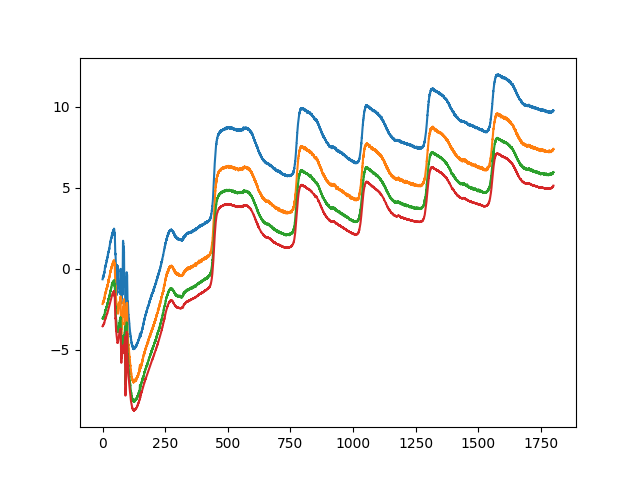

/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_1809/3993821204.py:46: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(master_fname, skiprows = 0, delimiter = "\t")


   flags     time/s  control/V     Ewe/V    <I>/mA  cycle number  \
0      6  391.56679   0.100025  0.099776  0.009422           1.0   
1      6  391.67679   0.100575  0.100322  0.008532           1.0   
2     22  391.87669   0.101574  0.101316  0.008926           1.0   
3     22  392.07659   0.102574  0.102335  0.008894           1.0   
4     22  392.27649   0.103573  0.103324  0.008901           1.0   

       (Q-Qo)/C  I Range  Rcmp/Ohm  
0  0.000000e+00       39  8.499999  
1  9.708003e-07       39  8.499998  
2  2.764443e-06       39  8.499998  
3  4.591464e-06       39  8.499998  
4  6.415492e-06       39  8.499998  
A
/Users/leppin/Documents/SYNC/People/Christian/Electroresponsivity_Co3O4/Folder_For_DataBase/FastEQCM-D/SmallLoadingRepeat1/after_1730mV/2025-05-22 CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_CA_at_0p8V_MSE_eq_1p73V_RHE_seq1/CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_CA_at_0p8V_MSE_eq_1p73V_RHE_seq1_dfc_by_n.txt


/opt/homebrew/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


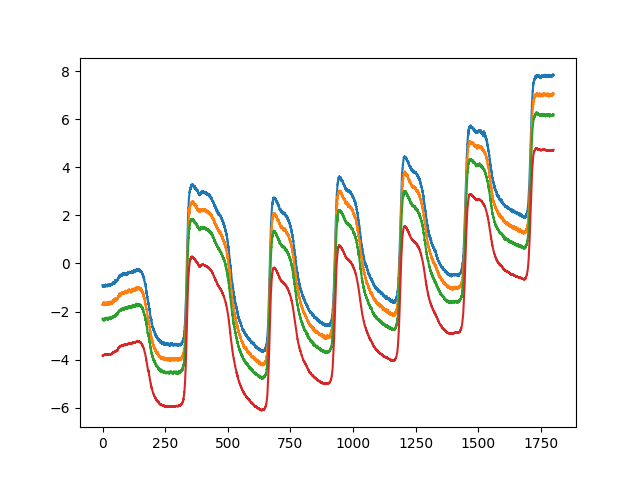

/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_1809/3993821204.py:46: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(master_fname, skiprows = 0, delimiter = "\t")


   flags     time/s  control/V     Ewe/V    <I>/mA  cycle number  \
0     22  394.14539   0.100025  0.099751  0.007820           1.0   
1     22  394.25539   0.100575  0.100324  0.007647           1.0   
2     22  394.45529   0.101574  0.101329  0.007958           1.0   
3      6  394.65519   0.102574  0.102307  0.007970           1.0   
4     22  394.85509   0.103573  0.103320  0.007930           1.0   

       (Q-Qo)/C  I Range  Rcmp/Ohm  
0  0.000000e+00       39  8.499999  
1  8.762282e-07       39  8.499998  
2  2.495423e-06       39  8.499998  
3  4.143435e-06       39  8.499998  
4  5.786466e-06       39  8.499998  
B


time (s)  cycle  \
fname                                                                 
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...      0.00    1.0   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...      0.02    1.0   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...      0.04    1.0   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...      0.06    1.0   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...      0.08    1.0   
...                                                      ...    ...   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...   1300.28    5.0   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...   1300.30    5.0   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...   1300.32    5.0   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...   1300.34    5.0   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...   1300.36    5.0   

                                                    potential (V)  \
fname                                                               
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...       0.099594   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...       0.099699   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...       0.099804   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...       0.099908   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...       0.100013   
...                                                           ...   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...       0.100313   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...       0.100216   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...       0.100119   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...       0.100022   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...       0.099885   

                                                    current (mA)  df/n 3 (Hz)  \
fname                                                                           
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...     -0.002292     8.184073   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...     -0.002210     8.181989   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...     -0.002127     8.177625   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...     -0.002044     8.173607   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...     -0.001961     8.172816   
...                                                          ...          ...   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...      0.000770     7.622503   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...      0.000761     7.621342   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...      0.000751     7.625089   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...      0.000742     7.630935   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...      0.000642     7.631934   

                                                    dG/n 3 (Hz)  df/n 5 (Hz)  \
fname                                                                          
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...     0.588812     6.330245   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...     0.590085     6.329246   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...     0.590424     6.320263   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...     0.594846     6.312529   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...     0.595814     6.312791   
...                                                         ...          ...   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...     1.891963     6.811598   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...     1.889442     6.818684   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...     1.885257     6.813895   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...     1.888523     6.817744   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...     1.882757     6.820232   

                                                    dG/n 5 (Hz)  df/n 7 (Hz)  \
fname                                                  

In [5]:
import os
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from numba import jit
import matplotlib.pyplot as plt
%matplotlib widget
from scipy import interpolate
from galvani import BioLogic
from scipy import stats
from scipy.signal import savgol_filter




def load_data_pstat_binary(master_fname: str) -> tuple[np.ndarray[float], np.ndarray[float], np.ndarray[float]]:
    mpr_file = BioLogic.MPRfile(master_fname)
    data = pd.DataFrame(mpr_file.data)
    print(data.head())
    data.to_csv(f'{master_fname[:-4]}.txt', sep = '\t')
    #data = np.array(data)
    voltage    = pd.Series(data['Ewe/V']); 
    current    = pd.Series(data['<I>/mA'])
    time          = pd.Series(data['time/s']- data['time/s'].iloc[0])
    cycle      = pd.Series(data['cycle number'])
    fnames     = pd.Series(np.full(np.shape(time), os.path.basename(master_fname)))
    return time, voltage, current, cycle, fnames

def discard_points(y: np.ndarray[float], trsh: int) -> np.ndarray[float]: 
    y[np.abs(y)>trsh]=np.nan
    y = pd.Series(y).interpolate().to_numpy()
    return y



def load_QCM_data(master_fname: str) -> np.ndarray[float]:
    data = pd.read_csv(master_fname, skiprows = 0, delimiter = "\t")
    data = np.array(data)
    time = data[:,0]/1000
    dfc_by_n = np.zeros((np.shape(data)[0], (np.shape(data)[1]-1)//2), dtype = complex)
    dfc_by_n.real = data[:, 1::2]
    dfc_by_n.imag = data[:, 2::2]
    return time, dfc_by_n

def load_trigger_data(master_fname: str) -> np.ndarray[float]: 
    data = pd.read_csv(master_fname, skiprows = 0, delimiter = "\t")
    trigger = np.array(data)[:,-1]
    return trigger 

def interpol(old_x: np.ndarray[float], old_y: np.ndarray[float], new_x: np.ndarray[float]) -> np.ndarray[float]:
    f = interpolate.interp1d(old_x, old_y, fill_value = 'extrapolate')
    new_y = f(new_x)
    return new_y

def correct_drift(x: np.ndarray[float], y: np.ndarray[float], positions: np.ndarray[int])-> np.ndarray[float]:
    print('positions: ', y[positions])
    slope, intercept, r_value, p_value, std_err = stats.linregress(x[positions],y[positions].real)
    y.real = y.real - slope*x
    f_drift = slope*x
    print('slope: ', slope)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x[positions],y[positions].imag)
    y.imag = y.imag - slope*x 
    return y, f_drift + 1j*slope*x







AllEQCMData = pd.DataFrame()
EQCM_files = []
PSTAT_files = []
TRIGGER_files = []
root = os.getcwd()
if __name__ == "__main__":
    for dirpath, dirnames, filenames in os.walk(root):
        for file in filenames:
            if file.endswith('.mpr') and file.__contains__('05_CV_C') and file.__contains__('seq1'):
                PSTAT_files.append(os.path.join(dirpath, file))
            if file.endswith('.txt') and file.__contains__('_dfc'):#eqcm
                EQCM_files.append(os.path.join(dirpath, file))
            if file.endswith('.txt') and file.__contains__('ResonaceCurves_1'):#trigger
                TRIGGER_files.append(os.path.join(dirpath, file))
    
    ####check here
    for i_file, (EQCM_file, PSTAT_file, TRIGGER_file) in enumerate(zip(EQCM_files, PSTAT_files, TRIGGER_files)): 
        print(EQCM_file)
        time, dfc_by_n = load_QCM_data(master_fname =EQCM_file)
        n_ovt = len(dfc_by_n[0,:])
        ns = np.array([3, 5, 7, 9, 11, 13])
        for iovt in range(n_ovt):
            dfc_by_n[:,iovt] = discard_points(dfc_by_n[:,iovt], 150)
            dfc_by_n.real[:,iovt] = savgol_filter(dfc_by_n.real[:,iovt], window_length = 53, polyorder = 1 )
            dfc_by_n.imag[:,iovt] = savgol_filter(dfc_by_n.imag[:,iovt], window_length = 53, polyorder = 1 )
        fig, ax = plt.subplots()
        plt.plot(time, dfc_by_n); plt.show()
        trigger = load_trigger_data(master_fname = TRIGGER_file)
        i_Trigs = np.zeros(0, dtype = int)	# finds data points, where the trigger signal jumps
        for i in range(2,len(trigger)-1):
            if (trigger[i]-trigger[i-1] > 0.5) and \
            (trigger[i]-trigger[i-1] > trigger[i-1]-trigger[i-2]) and \
            (trigger[i]-trigger[i-1] > trigger[i+1]-trigger[i]) :
                i_Trigs = np.append(i_Trigs,i)

        time -= time[i_Trigs[0]]
        time = time[i_Trigs[0]:]
        dfc_by_n = dfc_by_n[i_Trigs[0]:, :]
        i_Trigs -= i_Trigs[0]

        time_iv, voltage, current, cycle, fnames = load_data_pstat_binary(PSTAT_file)

        if time_iv.iloc[-1] > time[-1]:
            print('A')
            i_end_time =  np.argmin(np.abs(time_iv-time[-1]))
            time_iv = time_iv[:i_end_time]
            voltage = voltage[:i_end_time]
            current = current[:i_end_time]
            cycle = cycle[:i_end_time]
            #print(time_iv)
        elif time[-1] > time_iv.iloc[-1]:
            print('B')
            i_end_time =  np.argmin(np.abs(time-time_iv.iloc[-1]))
            time= time[:i_end_time]
            dfc_by_n= dfc_by_n[:i_end_time, :]

        voltage_dfG = interpol(old_x = time_iv, old_y = voltage, new_x = time)
        current_dfG = interpol(old_x = time_iv, old_y = current, new_x = time)
        cycle_dfG   = interpol(old_x = time_iv, old_y = cycle,   new_x = time)

        #construc a data frame usinf pandas data structures. 
        EQCMData = {'time (s)': time, 
                    'cycle':    cycle_dfG,
                    'potential (V)': voltage_dfG, 
                    'current (mA)': current_dfG, 
                    'fname': np.full(np.shape(time), fnames[0])}
        for i_ovt in range(n_ovt): 
            EQCMData[f'df/n {ns[i_ovt]} (Hz)'] = dfc_by_n[:, i_ovt].real
            EQCMData[f'dG/n {ns[i_ovt]} (Hz)'] = dfc_by_n[:, i_ovt].imag
        EQCMData = pd.DataFrame(EQCMData)
        AllEQCMData = pd.concat([AllEQCMData, EQCMData])
    AllEQCMData_indexed = AllEQCMData.set_index(['fname'])
    #AllEQCMData_indexed = AllEQCMData_indexed.sort_index()
AllEQCMData_indexed

### Make an Interactive Plot

<>:52: SyntaxWarning: invalid escape sequence '\m'
<>:64: SyntaxWarning: invalid escape sequence '\D'
<>:75: SyntaxWarning: invalid escape sequence '\m'
<>:93: SyntaxWarning: invalid escape sequence '\m'
<>:109: SyntaxWarning: invalid escape sequence '\D'
<>:52: SyntaxWarning: invalid escape sequence '\m'
<>:64: SyntaxWarning: invalid escape sequence '\D'
<>:75: SyntaxWarning: invalid escape sequence '\m'
<>:93: SyntaxWarning: invalid escape sequence '\m'
<>:109: SyntaxWarning: invalid escape sequence '\D'
/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_1809/2337783789.py:52: SyntaxWarning: invalid escape sequence '\m'
  axs[0].set_ylabel('$i_{\mathrm{geo}} \ \mathrm{(mA \ cm^{-2}})$', fontsize=16)
/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_1809/2337783789.py:64: SyntaxWarning: invalid escape sequence '\D'
  axs[1].set_ylabel("$\Delta f/n$ (Hz)", fontsize=16)
/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_1809/2337783789.py:75: SyntaxWarning: inva

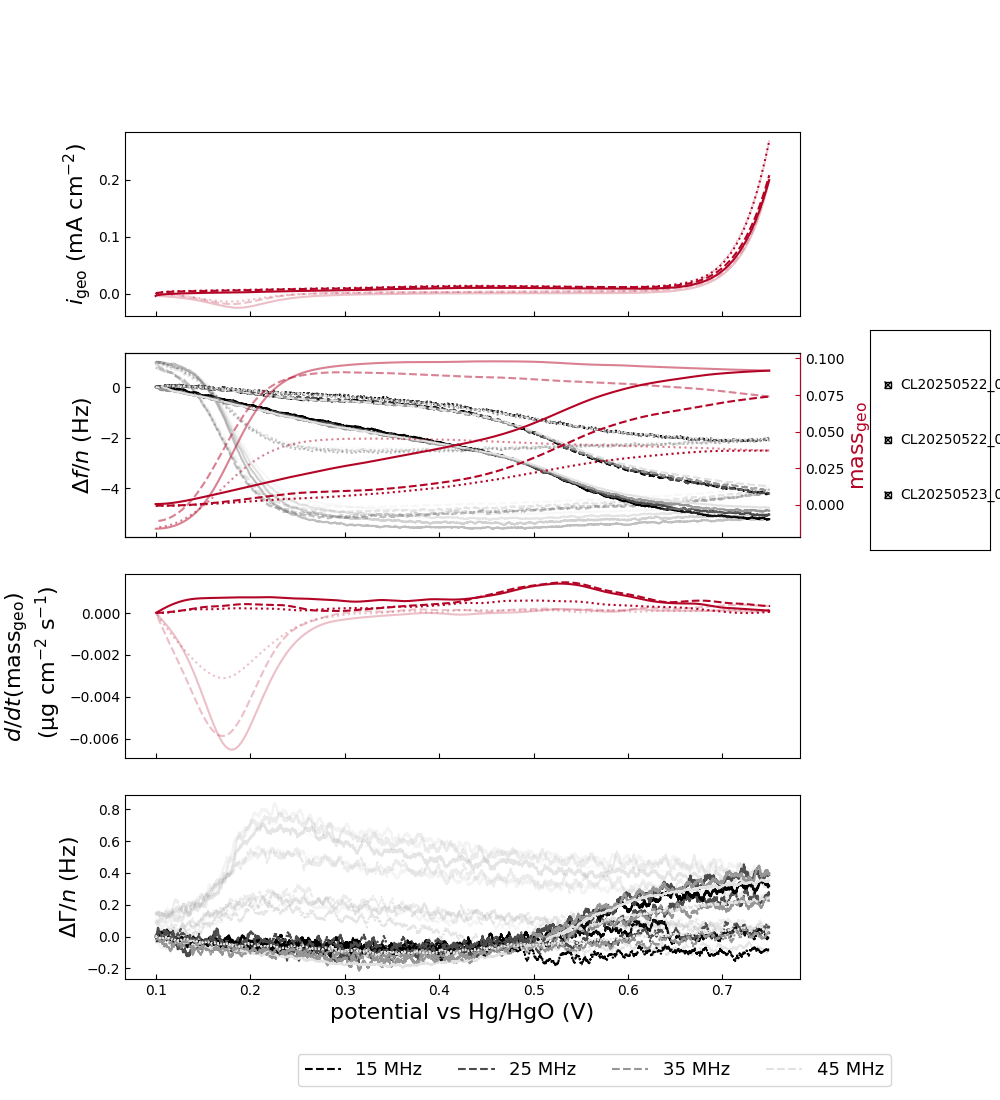

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib import cm
from scipy.ndimage import gaussian_filter1d
from matplotlib.widgets import CheckButtons  # INTERACTIVE CHECKBOXES

plot_versus_t = True
colors = [
    (0/255,0/255,0/255), (255/255,0/255,0/255), (0/255,255/255,0/255), (0/255,0/255,255/255),
    (0/255,255/255,255/255), (255/255,0/255,255/255), (255/255,255/255,0/255), (128/255,128/255,0/255),
    (0/255,0/255,128/255), (128/255,0/255,128/255), (128/255,0/255,0/255), (0/255,128/255,0/255), (0/255,128/255,128/255),
    (0/255,0/255,160/255), (255/255,128/255,0/255), (128/255,0/255,255/255), (255/255,0/255,128/255),
    (255/255,255/255,255/255), (0/255,0/255,0/255), (192/255,192/255,192/255), (128/255,128/255,128/255)
]

n_cycle = 3

def CalcSauerbreyMass(df_by_n: np.ndarray, Filter: bool = True) -> np.ndarray: 
    Zq = 8.8e6
    f0 = 5e6
    MassDensity = -df_by_n * Zq / (2*f0**2) * 1e5  # conversion of kg/m2 in ug/cm2
    return gaussian_filter1d(MassDensity, 150, axis=0) if Filter else MassDensity

def discard_points(y: np.ndarray, trsh: int) -> np.ndarray: 
    y[np.abs(y) > trsh] = np.nan
    return pd.Series(y).interpolate().to_numpy()

labels = ['15 MHz', '25 MHz', '35 MHz', '45 MHz']
lines  = ['--', '-', ':']

SelectedData = AllEQCMData_indexed[AllEQCMData_indexed['cycle'].isin([n_cycle])]

samples = sorted(set(SelectedData.index.get_level_values('fname')))

fig, axs = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=[10,11])
axs[0].tick_params(which='both', direction="in", labelsize=10)

sample_lines = {sample: [] for sample in samples}  # STORE LINES FOR INTERACTIVITY

for i_sample, sample in enumerate(samples):
    df = SelectedData.loc[(sample)]
    len_anodic_wave = len(df['df/n 3 (Hz)']) // 2

    # Plot current
    l1a, = axs[0].plot(df['potential (V)'].iloc[:len_anodic_wave], df['current (mA)'].iloc[:len_anodic_wave],
                       linestyle=lines[i_sample], color=cm.coolwarm(500))
    l1c, = axs[0].plot(df['potential (V)'].iloc[len_anodic_wave:], df['current (mA)'].iloc[len_anodic_wave:],
                       linestyle=lines[i_sample], color=cm.coolwarm(500), alpha=0.25)
    sample_lines[sample] += [l1a, l1c]
axs[0].set_ylabel('$i_{\mathrm{geo}} \ \mathrm{(mA \ cm^{-2}})$', fontsize=16)

ovt_keys_f = SelectedData.keys()[4::2]
axs[1].tick_params(which='both', direction="in", labelsize=10)
for i_sample, sample in enumerate(samples):
    df = SelectedData.loc[(sample)]
    for i_ovt, ovt_key in enumerate(ovt_keys_f):
        l2a, = axs[1].plot(df['potential (V)'].iloc[:len_anodic_wave], (df[ovt_key]-df[ovt_key].iloc[0]).iloc[:len_anodic_wave],
                           linestyle=lines[i_sample], color=cm.gray(i_ovt*75))
        l2c, = axs[1].plot(df['potential (V)'].iloc[len_anodic_wave:], (df[ovt_key]-df[ovt_key].iloc[0]).iloc[len_anodic_wave:],
                           linestyle=lines[i_sample], color=cm.gray(i_ovt*75), alpha=0.25)
        sample_lines[sample] += [l2a, l2c]
axs[1].set_ylabel("$\Delta f/n$ (Hz)", fontsize=16)

ax2 = axs[1].twinx()
for i_sample, sample in enumerate(samples):
    df = SelectedData.loc[(sample)]
    SauerbreyMass = CalcSauerbreyMass(df['df/n 3 (Hz)'] - df['df/n 3 (Hz)'].iloc[0])
    l3a, = ax2.plot(df['potential (V)'].iloc[:len_anodic_wave], SauerbreyMass[:len_anodic_wave],
                    linestyle=lines[i_sample], color=cm.coolwarm(500))
    l3c, = ax2.plot(df['potential (V)'].iloc[len_anodic_wave:], SauerbreyMass[len_anodic_wave:],
                    linestyle=lines[i_sample], color=cm.coolwarm(500), alpha=0.5)
    sample_lines[sample] += [l3a, l3c]
ax2.set_ylabel('$\mathrm{mass_{geo}}$ \n ($\mathrm{\mu g \ cm^{-2}}$)', fontsize=16)
ax2.spines['right'].set_color(cm.coolwarm(500))
ax2.tick_params(axis='y', color=cm.coolwarm(500), direction='in')
ax2.yaxis.label.set_color(cm.coolwarm(500))
ax2.tick_params(which='both', labelsize=10, labelright=True)

axs[2].tick_params(which='both', direction="in", labelsize=10)
for i_sample, sample in enumerate(samples):
    df = SelectedData.loc[(sample)]
    SauerbreyMass = CalcSauerbreyMass(df['df/n 3 (Hz)'] - df['df/n 3 (Hz)'].iloc[0])
    time = df['time (s)']
    rate = (np.roll(SauerbreyMass, -1) - SauerbreyMass) / (time[1] - time[0])
    rate_clean = discard_points(rate[5:-5], 1)
    l4a, = axs[2].plot(df['potential (V)'].iloc[5:-5].iloc[:len_anodic_wave], rate_clean[:len_anodic_wave],
                       linestyle=lines[i_sample], color=cm.coolwarm(500))
    l4c, = axs[2].plot(df['potential (V)'].iloc[5:-5].iloc[len_anodic_wave:], rate_clean[len_anodic_wave:],
                       linestyle=lines[i_sample], color=cm.coolwarm(500), alpha=0.25)
    sample_lines[sample] += [l4a, l4c]
axs[2].set_ylabel('$d/dt(\mathrm{mass_{geo}})$ \n ($\mathrm{\mu g \ cm^{-2} \ s^{-1}}$)', fontsize=16)

ovt_keys_g = SelectedData.keys()[5::2]
axs[3].tick_params(which='both', direction="in", labelsize=10)
for i_sample, sample in enumerate(samples):
    df = SelectedData.loc[(sample)]
    for i_ovt, ovt_key in enumerate(ovt_keys_g):
        if i_sample == 0: 
            l5a, = axs[3].plot(df['potential (V)'].iloc[:len_anodic_wave], (df[ovt_key] - df[ovt_key].iloc[0]).iloc[:len_anodic_wave],
                            linestyle=lines[i_sample], color=cm.gray(i_ovt*75), label=labels[i_ovt])
        else: 
            l5a, = axs[3].plot(df['potential (V)'].iloc[:len_anodic_wave], (df[ovt_key] - df[ovt_key].iloc[0]).iloc[:len_anodic_wave],
                linestyle=lines[i_sample], color=cm.gray(i_ovt*75))
        l5c, = axs[3].plot(df['potential (V)'].iloc[len_anodic_wave:], (df[ovt_key] - df[ovt_key].iloc[0]).iloc[len_anodic_wave:],
                           linestyle=lines[i_sample], color=cm.gray(i_ovt*75), alpha=0.1)
        sample_lines[sample] += [l5a, l5c]
axs[3].set_ylabel('$\Delta \Gamma/n$ (Hz)', fontsize=16)
axs[3].set_xlabel('potential vs Hg/HgO (V)', fontsize=16)

# INTERACTIVE CHECKBOXES
rax = plt.axes([0.87, 0.5, 0.12, 0.2])
checkbox_labels = [str(sample) for sample in samples]
visibility = [True] * len(samples)
check = CheckButtons(rax, checkbox_labels, visibility)

def toggle_sample(label):
    for line in sample_lines[label]:
        line.set_visible(not line.get_visible())
    plt.draw()

check.on_clicked(toggle_sample)
plt.subplots_adjust(right=0.8)
fig.legend(bbox_to_anchor=(0.9, 0.05), ncol = 4, fontsize = 13)
plt.savefig(fname=f"result_{n_cycle}.tif", dpi=600, pil_kwargs={"compression": "tiff_lzw"}, bbox_inches='tight')
plt.show()


In [7]:
samples

['CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_CA_at_0p8V_MSE_eq_1p73V_RHE_seq1_05_CV_C01.mpr',
 'CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_seq1_05_CV_C01.mpr',
 'CL20250523_002_#6_Co3O4Nps_CV_5mVpers_after1h_CA_at_1p0V_MSE_eq_1p93V_RHE_seq1_05_CV_C01.mpr']

## Make a Differential Tafel Plot

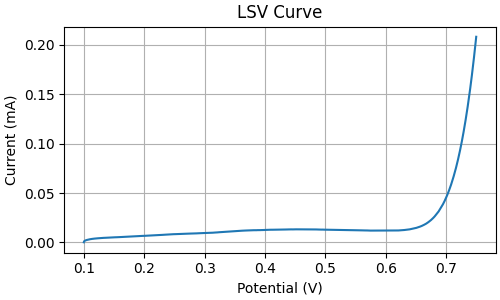

Tafel slope (order 0): 76.27+/-0.09 mV/dec
Tafel slope (order 1): 65.95+/-0.20 mV/dec
Tafel slope (order 2): 65.75+/-6.77 mV/dec
Tafel slope (order 3): -89.52+/-16.75 mV/dec


/opt/homebrew/anaconda3/lib/python3.12/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


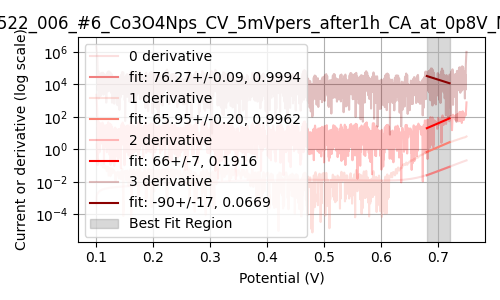

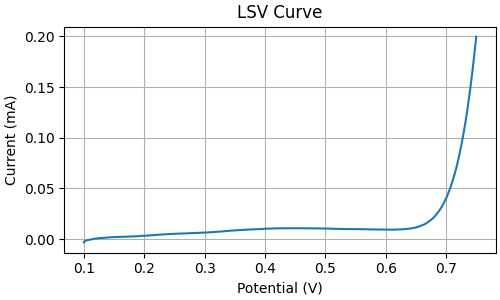

Tafel slope (order 0): 70.97+/-0.06 mV/dec
Tafel slope (order 1): 64.25+/-0.16 mV/dec
Tafel slope (order 2): 81.26+/-7.62 mV/dec
Tafel slope (order 3): 222.60+/-109.61 mV/dec


/opt/homebrew/anaconda3/lib/python3.12/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


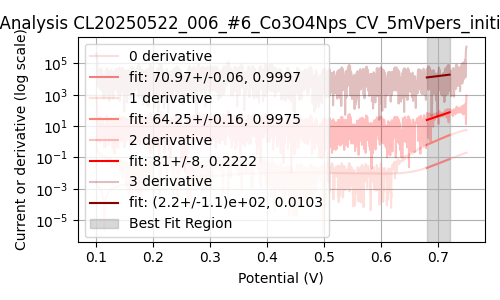

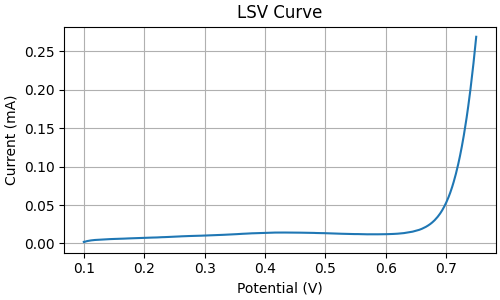

Tafel slope (order 0): 72.85+/-0.12 mV/dec
Tafel slope (order 1): 60.45+/-0.11 mV/dec
Tafel slope (order 2): 56.23+/-3.38 mV/dec
Tafel slope (order 3): -301.69+/-170.33 mV/dec


/opt/homebrew/anaconda3/lib/python3.12/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


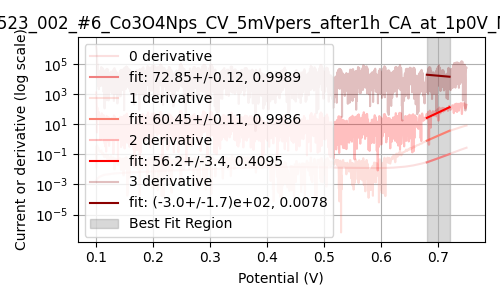

In [8]:
import os
import pandas as pd
from galvani import BioLogic
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import CheckButtons
from matplotlib.colors import LinearSegmentedColormap
from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from lmfit.models import LinearModel
from uncertainties import ufloat


colors = ['lightcoral', 'salmon', 'red', 'darkred']

def lmfit_slope_stats(potential_segment, log_data_segment):
    """Fit a line using lmfit LinearModel and return slope, slope error, and R²."""
    model = LinearModel()
    params = model.make_params(intercept=0, slope=1)
    result = model.fit(log_data_segment, params, x=potential_segment)
    slope = result.params['slope'].value
    slope_error = result.params['slope'].stderr
    r_squared = result.rsquared
    fit = 10**result.best_fit
    return slope, slope_error, r_squared, fit



def find_best_linear_region(E, Y, window_size=20):
    log_Y = np.log10(np.abs(Y))
    best_r2 = -np.inf
    best_range = (0, window_size)
    for i in range(len(E) - window_size):
        E_window = E[i:i + window_size].reshape(-1, 1)
        Y_window = log_Y[i:i + window_size]
        model = LinearRegression().fit(E_window, Y_window)
        r2 = r2_score(Y_window, model.predict(E_window))
        if r2 > best_r2:
            best_r2 = r2
            best_range = (i, i + window_size)
    return best_range, best_r2



def differential_tafel_analysis_iterative(potential, current_density, window_length=31, polyorder=3, threshold=0.05, max_order=3):
    current_derivatives = [savgol_filter(current_density, window_length, polyorder)]
    fits         = np.ones((len(current_density), max_order+1))*np.nan
    slopes       = []
    R2s          = []
    tafel_slopes = []
    for order in range(0, max_order + 1):
        if order >= len(current_derivatives):
            derivative = np.gradient(current_derivatives[order - 1], potential)
            smoothed = savgol_filter(derivative, window_length, polyorder)
            current_derivatives.append(smoothed)


    best_range, best_r2 = find_best_linear_region(potential, current_derivatives[2], window_size=30)
    #start, end = best_range
    start, end = np.argmin(np.abs(potential-0.68)), np.argmin(np.abs(potential-0.72))
        
    for order in range(0, max_order + 1):
        pot_fit = potential[start:end]
        log_fit = np.log10(np.abs(current_derivatives[order][start:end]))

        slope, slope_error, r_squared, fit = lmfit_slope_stats(potential_segment = pot_fit, log_data_segment = log_fit)
        slope_with_uncertainty = ufloat(slope, slope_error)
        tafel_slope = 1 / slope_with_uncertainty * 1000 #mV
        slopes.append(tafel_slope)
        R2s.append(np.round(r_squared, 4))
        fits[start:end, order] = fit
        print(f"Tafel slope (order {order}): {tafel_slope:.2f} mV/dec")
        tafel_slopes.append(tafel_slope)




    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(5, 3))
    for i in range(max_order + 1):  # Only plot up to max_order
        ax.semilogy(potential, np.abs(current_derivatives[i]), color = colors[i], label=f'{i} derivative', alpha = 0.25)
        ax.semilogy(potential[start:end], fits[start:end,i], color = colors[i], label=f'fit: {slopes[i]}, {R2s[i]}')
    ax.axvspan(potential[start], potential[end-1], color='gray', alpha=0.3, label='Best Fit Region')
    ax.set_xlabel('Potential (V)')
    ax.set_ylabel('Current or derivative (log scale)')
    ax.set_title(f'Differential Tafel Analysis {sample}')
    ax.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    overpotential = potential[np.argmin(np.abs((current_density-0.1)))]
    tafel_slopes.append(overpotential)
    tafel_slopes = pd.DataFrame([tafel_slopes], columns = ['tafel slope 0', 'tafel slope 1', 'tafel slope 2', 'tafel slope 3', 'overpotential'])
    return tafel_slopes



# Main loop
n_cycle = 3

resultsEQCM = pd.DataFrame() 
# Plot data by sample and perturbation
for i_sample, sample in enumerate(samples):
    df = AllEQCMData_indexed.loc[(sample)]
    df = df[df['cycle'] == n_cycle]
    len_anodic_wave = len(df['potential (V)'])//2
    fig, ax = plt.subplots(nrows = 1, ncols = 1, constrained_layout = True, figsize = (5, 3))     
    ax.plot(df['potential (V)'].to_numpy()[2:len_anodic_wave],
                df['current (mA)'].to_numpy()[2:len_anodic_wave])
    ax.set_xlabel("Potential (V)")
    ax.set_ylabel("Current (mA)")
    ax.set_title("LSV Curve")
    plt.grid(True)
    plt.show()
    tafel_slopesEQCM = differential_tafel_analysis_iterative(df['potential (V)'].to_numpy()[2:len_anodic_wave], df['current (mA)'].to_numpy()[2:len_anodic_wave])
    tafel_slopesEQCM.index = [os.path.basename(sample)]
    resultsEQCM = pd.concat([resultsEQCM, tafel_slopesEQCM])
 

### Add Infos to the Tafel Plot Results

In [9]:
tafel_plot_dataEQCM = pd.concat([resultsEQCM['tafel slope 0'].apply(lambda x: x.n), resultsEQCM['tafel slope 0'].apply(lambda x: x.s), resultsEQCM['overpotential']], axis = 1)
tafel_plot_dataEQCM.columns = ['tafel slope', 'error', 'overpotential']
tafel_plot_dataEQCM['info'] = tafel_plot_dataEQCM.index.map(
    lambda idx: (
        'Pristine' if 'ini' in idx else
        '1 h at 1.73 V' if 'at_0_' in idx or '0p8' in idx else
        '1 h at 1.93 V' if 'at_1' in idx else
        'unknown'
    )
)
tafel_plot_dataEQCM = tafel_plot_dataEQCM.sort_values(by='tafel slope', ascending=True)
tafel_plot_dataEQCM

tafel slope     error  \
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...    70.967225  0.064506   
CL20250523_002_#6_Co3O4Nps_CV_5mVpers_after1h_C...    72.850854  0.123063   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...    76.271633  0.093756   

                                                    overpotential  \
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...       0.727310   
CL20250523_002_#6_Co3O4Nps_CV_5mVpers_after1h_C...       0.718928   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...       0.725029   

                                                             info  
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...       Pristine  
CL20250523_002_#6_Co3O4Nps_CV_5mVpers_after1h_C...  1 h at 1.93 V  
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...  1 h at 1.73 V

### Plot Tafel Slopes and Overpotentials

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_1809/940795342.py:12: SyntaxWarning: invalid escape sequence '\m'
  axs[0].set_ylabel('Tafel slope  \n $\mathrm{(mV \ dec^{-1})}$', fontsize = 6)
/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_1809/940795342.py:18: SyntaxWarning: invalid escape sequence '\m'
  axs[1].set_ylabel('overpotential vs RHE \n at 0.1 $\mathrm{mA \ cm^{-2} \ (V)}$', fontsize = 6)


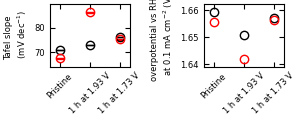

In [10]:

def convert_potential(E_old, pH=13, Eref_old = 0.165): 
    E_new = E_old + Eref_old + 0.059*pH
    return E_new

fig, axs = plt.subplots(ncols=2, nrows=1, constrained_layout = True, figsize = [3, 1.2])
[ax.tick_params(which = 'both', direction = 'in', bottom = True, top = True, left = True, right = True, labelsize = 6) for ax in axs]

#tafel slopes
axs[0].errorbar(tafel_plot_dataEQCM['info'], tafel_plot_dataEQCM['tafel slope'], tafel_plot_dataEQCM['error'], linestyle = 'none', marker = 'o', capsize = 3, fillstyle = 'none', color = 'black', label = 'before EIS')
axs[0].errorbar(tafel_plot_data['info'], tafel_plot_data['tafel slope'], tafel_plot_data['error'], linestyle = 'none', marker = 'o', capsize = 3, fillstyle = 'none', color = 'red', label = 'after EIS')
axs[0].tick_params(axis = 'x', labelrotation = 45, labelsize = 6)
axs[0].set_ylabel('Tafel slope  \n $\mathrm{(mV \ dec^{-1})}$', fontsize = 6)


axs[1].plot(tafel_plot_dataEQCM['info'], convert_potential(tafel_plot_dataEQCM['overpotential']), linestyle = 'none', marker = 'o', fillstyle = 'none', color = 'black')
axs[1].plot(tafel_plot_data['info'], convert_potential(tafel_plot_data['overpotential']),  linestyle = 'none', marker = 'o', fillstyle = 'none', color = 'red')
axs[1].tick_params(axis = 'x', labelrotation = 45, labelsize = 6)
axs[1].set_ylabel('overpotential vs RHE \n at 0.1 $\mathrm{mA \ cm^{-2} \ (V)}$', fontsize = 6)

for ax in np.ravel(axs):
    ax.margins(x=0.17, y=0.17)

fig.legend(bbox_to_anchor=(0.5, -0.05), loc = 'center', ncol = 2, fontsize = 6, frameon = False)
plt.savefig(fname=f"Tafel_slopes_overpotentials.tif", dpi=600, pil_kwargs={"compression": "tiff_lzw"}, bbox_inches='tight')
plt.show()

In [11]:
tafel_plot_dataEQCM['before EIS'] = 'Yes'
tafel_plot_data['before EIS'] = 'No'
tafel_plot_data_all = pd.concat([tafel_plot_data, tafel_plot_dataEQCM])
tafel_plot_data_all

tafel slope     error  \
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...    67.333172  0.054941   
CL20250522_006_#6_Co3O4Nps_CVafter1h_CA_at_0p8V...    75.266025  0.135410   
CL20250523_003_#6_Co3O4Nps_CV_5mVpers_after1h_C...    86.451327  0.143573   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...    70.967225  0.064506   
CL20250523_002_#6_Co3O4Nps_CV_5mVpers_after1h_C...    72.850854  0.123063   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...    76.271633  0.093756   

                                                    overpotential  \
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...       0.723507   
CL20250522_006_#6_Co3O4Nps_CVafter1h_CA_at_0p8V...       0.724447   
CL20250523_003_#6_Co3O4Nps_CV_5mVpers_after1h_C...       0.710156   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...       0.727310   
CL20250523_002_#6_Co3O4Nps_CV_5mVpers_after1h_C...       0.718928   
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...       0.725029   

                                                             info before EIS  
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...       Pristine         No  
CL20250522_006_#6_Co3O4Nps_CVafter1h_CA_at_0p8V...  1 h at 1.73 V         No  
CL20250523_003_#6_Co3O4Nps_CV_5mVpers_after1h_C...  1 h at 1.93 V         No  
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_s...       Pristine        Yes  
CL20250523_002_#6_Co3O4Nps_CV_5mVpers_after1h_C...  1 h at 1.93 V        Yes  
CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_C...  1 h at 1.73 V        Yes

In [12]:

AllEQCMData_indexed.to_parquet("AllEQCMData_indexed.parquet")
tafel_plot_data_all.to_parquet("tafel_plot_data_all.parquet")

## Plot of the Single Measurement as Figure 1 (Left)

<>:78: SyntaxWarning: invalid escape sequence '\m'
<>:78: SyntaxWarning: invalid escape sequence '\m'
/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_1809/1496898520.py:78: SyntaxWarning: invalid escape sequence '\m'
  ax2.set_ylabel('$\mathrm{mass_{geo}}$ ($\mathrm{\mu g \ cm^{-2}}$)', fontsize=7)


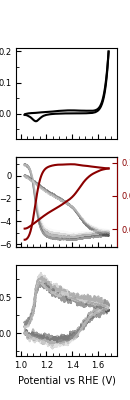

In [13]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib import cm
from scipy.ndimage import gaussian_filter1d
from matplotlib.ticker import AutoMinorLocator

n_cycle = 3

def convert_potential(E_old, pH=13, Eref_old = 0.165): 
    E_new = E_old + Eref_old + 0.059*pH
    return E_new

def CalcSauerbreyMass(df_by_n: np.ndarray, Filter: bool = True) -> np.ndarray: 
    Zq = 8.8e6
    f0 = 5e6
    MassDensity = -df_by_n * Zq / (2*f0**2) * 1e5  # conversion of kg/m2 in ug/cm2
    return gaussian_filter1d(MassDensity, 150, axis=0) if Filter else MassDensity

def discard_points(y: np.ndarray, trsh: int) -> np.ndarray: 
    y[np.abs(y) > trsh] = np.nan
    return pd.Series(y).interpolate().to_numpy()

labels = ['15 MHz', '25 MHz', '35 MHz', '45 MHz']
lines  = ['-', '--', '-']

SelectedData = AllEQCMData_indexed[AllEQCMData_indexed['cycle'].isin([n_cycle])]
def sample_sort_key(s):
    if "initial" in s:
        return 0
    elif "at_0" in s:
        return 1
    elif "at_1" in s or "at_1V" in s:
        return 2
    else:
        return 3  # fallback
samples = set(SelectedData.index.get_level_values('fname'))
samples = [sorted(samples, key=sample_sort_key)[0]]


fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=[1.3,4])
axs[0].tick_params(which='both', direction="in", labelsize=6)

for i_sample, sample in enumerate(samples):
    df = SelectedData.loc[(sample)]
    len_anodic_wave = len(df['df/n 3 (Hz)']) // 2

    # Plot current
    axs[0].plot(convert_potential(df['potential (V)'].iloc[:len_anodic_wave]), df['current (mA)'].iloc[:len_anodic_wave],
                       linestyle=lines[i_sample], color='black')
    axs[0].plot(convert_potential(df['potential (V)'].iloc[len_anodic_wave:]), df['current (mA)'].iloc[len_anodic_wave:],
                       linestyle=lines[i_sample], color='black')
axs[0].set_ylabel(r'$i_{\mathrm{geo}} \ \mathrm{(mA \ cm^{-2}})$', fontsize=7)
axs[0].set_ylim(bottom = -0.08)

ovt_keys_f = SelectedData.keys()[4::2]
axs[1].tick_params(which='both', direction="in", labelsize=6)
for i_sample, sample in enumerate(samples):
    df = SelectedData.loc[(sample)]
    for i_ovt, ovt_key in enumerate(ovt_keys_f):
        axs[1].plot(convert_potential(df['potential (V)'].iloc[:len_anodic_wave]), (df[ovt_key]-df[ovt_key].iloc[0]).iloc[:len_anodic_wave],
                           linestyle=lines[i_sample], color=cm.gray(i_ovt*80), alpha = 0.4)
        axs[1].plot(convert_potential(df['potential (V)'].iloc[len_anodic_wave:]), (df[ovt_key]-df[ovt_key].iloc[0]).iloc[len_anodic_wave:],
                           linestyle=lines[i_sample], color=cm.gray(i_ovt*80), alpha=0.4)
axs[1].set_ylabel(r"$\Delta f/n$ (Hz)", fontsize=7)

ax2 = axs[1].twinx()
sec_axs = ax2
for i_sample, sample in enumerate(samples):
    df = SelectedData.loc[(sample)]
    SauerbreyMass = CalcSauerbreyMass(df['df/n 3 (Hz)'] - df['df/n 3 (Hz)'].iloc[0])
    ax2.plot(convert_potential(df['potential (V)'].iloc[:len_anodic_wave]), SauerbreyMass[:len_anodic_wave],
                    linestyle=lines[i_sample], color='darkred')
    ax2.plot(convert_potential(df['potential (V)'].iloc[len_anodic_wave:]), SauerbreyMass[len_anodic_wave:],
                    linestyle=lines[i_sample], color='darkred')
    sample_lines[sample] += [l3a, l3c]
ax2.set_ylabel('$\mathrm{mass_{geo}}$ ($\mathrm{\mu g \ cm^{-2}}$)', fontsize=7)
ax2.spines['right'].set_color('darkred')
ax2.yaxis.label.set_color('darkred')
ax2.tick_params(which='both', labelsize=6, labelright=True, colors = 'darkred', direction = 'in')



ovt_keys_g = SelectedData.keys()[5::2]
axs[2].tick_params(which='both', direction="in", labelsize=6)
for i_sample, sample in enumerate(samples):
    df = SelectedData.loc[(sample)]
    for i_ovt, ovt_key in enumerate(ovt_keys_g):
        if i_sample == 0: 
            axs[2].plot(convert_potential(df['potential (V)'].iloc[:len_anodic_wave]), (df[ovt_key] - df[ovt_key].iloc[0]).iloc[:len_anodic_wave],
                            linestyle=lines[i_sample], color=cm.gray(i_ovt*80), label=labels[i_ovt], alpha = 0.4)
        else: 
            axs[2].plot(convert_potential(df['potential (V)'].iloc[:len_anodic_wave]), (df[ovt_key] - df[ovt_key].iloc[0]).iloc[:len_anodic_wave],
                linestyle=lines[i_sample], color=cm.gray(i_ovt*80), alpha = 0.4)
        axs[2].plot(convert_potential(df['potential (V)'].iloc[len_anodic_wave:]), (df[ovt_key] - df[ovt_key].iloc[0]).iloc[len_anodic_wave:],
                           linestyle=lines[i_sample], color=cm.gray(i_ovt*80), alpha = 0.4)
        sample_lines[sample] += [l5a, l5c]
axs[2].set_ylabel(r'$\Delta \Gamma/n$ (Hz)', fontsize=7)
axs[2].set_xlabel('Potential vs RHE (V)',    fontsize=7)



for iax, ax in enumerate(axs):
    if iax == 1:
        ax.yaxis.set_label_coords(-0.2, 0.55)
    else:
        ax.yaxis.set_label_coords(-0.2, 0.5) 
    
    ax.margins(x=0.1, y=0.1)
    ax.set_xticks([1.0, 1.2, 1.4, 1.6])
    ax.yaxis.set_minor_locator(AutoMinorLocator(n = 2))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n = 4))

sec_axs.yaxis.set_label_coords(1.2, 0.5)
sec_axs.margins(x=0.1, y=0.1)
#fig.legend(bbox_to_anchor=(0.9, 0.05), ncol = 4, fontsize = 13)
plt.savefig(fname=f"result_cycle{n_cycle}_left.tif", dpi=600, pil_kwargs={"compression": "tiff_lzw"}, bbox_inches='tight', transparent = True)
plt.show()


## Plot of the Single Measurement as Figure 1 (Right)

<>:86: SyntaxWarning: invalid escape sequence '\m'
<>:106: SyntaxWarning: invalid escape sequence '\m'
<>:86: SyntaxWarning: invalid escape sequence '\m'
<>:106: SyntaxWarning: invalid escape sequence '\m'
/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_1809/3083076582.py:86: SyntaxWarning: invalid escape sequence '\m'
  axs[2].set_ylabel('Mass per electron \n ($\mathrm{g \ mol^{-1}}$)', fontsize=7)
/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_1809/3083076582.py:106: SyntaxWarning: invalid escape sequence '\m'
  axs[1].set_ylabel('$d/dt(\mathrm{mass_{geo}})$ \n ($\mathrm{ ng \ cm^{-2} \ s^{-1}}$)', fontsize=7)
/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_1809/3083076582.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rate = np.abs((np.roll(SauerbreyMass, -1)

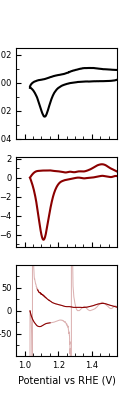

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib import cm
from scipy.ndimage import gaussian_filter1d

n_cycle = 3

def convert_potential(E_old, pH=13, Eref_old = 0.165): 
    E_new = E_old + Eref_old + 0.059*pH
    return E_new

def CalcSauerbreyMass(df_by_n: np.ndarray, Filter: bool = True) -> np.ndarray: 
    Zq = 8.8e6
    f0 = 5e6
    MassDensity = -df_by_n * Zq / (2*f0**2) * 1e5  # conversion of kg/m2 in ug/cm2
    return gaussian_filter1d(MassDensity, 150, axis=0) if Filter else MassDensity

def discard_points(y: np.ndarray, trsh: int) -> np.ndarray: 
    y[np.abs(y) > trsh] = np.nan
    return pd.Series(y).interpolate().to_numpy()

labels = ['15 MHz', '25 MHz', '35 MHz', '45 MHz']
lines  = ['-', '--', '-']

SelectedData = AllEQCMData_indexed[AllEQCMData_indexed['cycle'].isin([n_cycle])]
def sample_sort_key(s):
    if "initial" in s:
        return 0
    elif "at_0" in s:
        return 1
    elif "at_1" in s or "at_1V" in s:
        return 2
    else:
        return 3  # fallback



samples = set(SelectedData.index.get_level_values('fname'))
samples = [sorted(samples, key=sample_sort_key)[0]]
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=[1.3,4])
axs[0].tick_params(which='both', direction="in", labelsize=6)

for i_sample, sample in enumerate(samples):
    
    df = SelectedData.loc[(sample)]
    len_anodic_wave = len(df['df/n 3 (Hz)']) // 2

    # Plot current
    axs[0].plot(convert_potential(df['potential (V)'].iloc[:len_anodic_wave]), df['current (mA)'].iloc[:len_anodic_wave],
                       linestyle=lines[i_sample], color='black')
    axs[0].plot(convert_potential(df['potential (V)'].iloc[len_anodic_wave:]), df['current (mA)'].iloc[len_anodic_wave:],
                       linestyle=lines[i_sample], color='black')
axs[0].set_ylabel(r'$i_{\mathrm{geo}} \ \mathrm{(mA \ cm^{-2}})$', fontsize=7)


for i_sample, sample in enumerate(samples):
    df = SelectedData.loc[(sample)]
    SauerbreyMass = CalcSauerbreyMass(df['df/n 3 (Hz)'] - df['df/n 3 (Hz)'].iloc[0])
    time = df['time (s)']

    rate = np.abs((np.roll(SauerbreyMass, -1) - SauerbreyMass) / (time[1] - time[0])/1000)
    MPE = 96485 * rate / (df['current (mA)'] / 1.17)
    potential = df['potential (V)'].values

    # Identify the index of the turning point (max potential)
    turning_idx = np.argmax(potential)

    # Split forward and backward scan
    fwd_pot = potential[:turning_idx+1]
    fwd_MPE = MPE[:turning_idx+1]
    bwd_pot = potential[turning_idx:]
    bwd_MPE = MPE[turning_idx:]

    # Apply masking
    fwd_mask = fwd_pot >= 0.145  # Keep data from 0.14 V onward
    bwd_mask = (bwd_pot <= 0.22) & (bwd_pot >= 0.1)

    # Plot masked data
    axs[2].plot(convert_potential(fwd_pot[fwd_mask]), fwd_MPE[fwd_mask], linestyle=lines[i_sample], color='darkred', linewidth = 0.75)
    axs[2].plot(convert_potential(bwd_pot[bwd_mask]), bwd_MPE[bwd_mask], linestyle=lines[i_sample], color='darkred', linewidth = 0.75)
    axs[2].plot(convert_potential(fwd_pot), fwd_MPE, linestyle=lines[i_sample], color='darkred', linewidth = 0.75, alpha = 0.3)
    axs[2].plot(convert_potential(bwd_pot), bwd_MPE, linestyle=lines[i_sample], color='darkred', linewidth = 0.75, alpha = 0.3)

axs[2].set_ylabel('Mass per electron \n ($\mathrm{g \ mol^{-1}}$)', fontsize=7)

axs[2].tick_params(which='both', labelsize=6, direction = 'in')
axs[2].set_ylim(bottom = -99, top = 99)


axs[2].set_xlabel('Potential vs RHE (V)', fontsize=7)


axs[1].tick_params(which='both', direction="in", labelsize=6)
for i_sample, sample in enumerate(samples):
    df = SelectedData.loc[(sample)]
    SauerbreyMass = CalcSauerbreyMass(df['df/n 3 (Hz)'] - df['df/n 3 (Hz)'].iloc[0])
    time = df['time (s)'].to_numpy()
    rate = (np.roll(SauerbreyMass, -1) - SauerbreyMass) / (time[1] - time[0])*1000
    rate_clean = discard_points(rate[5:-5], 20)
    axs[1].plot(convert_potential(df['potential (V)'].iloc[5:-5].iloc[:len_anodic_wave]), rate_clean[:len_anodic_wave],
                       linestyle=lines[i_sample], color='darkred')
    axs[1].plot(convert_potential(df['potential (V)'].iloc[5:-5].iloc[len_anodic_wave:]), rate_clean[len_anodic_wave:],
                       linestyle=lines[i_sample], color='darkred')
axs[1].set_ylabel('$d/dt(\mathrm{mass_{geo}})$ \n ($\mathrm{ ng \ cm^{-2} \ s^{-1}}$)', fontsize=7)
for ax in axs:
    ax.yaxis.set_label_coords(-0.3, 0.5)
    ax.set_xlim(left = 0.95, right=1.55)
    ax.margins(x=0.1, y=0.1)
    ax.set_xticks([1.0, 1.2, 1.4])
    ax.yaxis.set_minor_locator(AutoMinorLocator(n = 2))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n = 4))
#fig.legend(bbox_to_anchor=(0.9, 0.05), ncol = 4, fontsize = 13)
axs[0].set_ylim(bottom = -0.04, top=0.025)

plt.savefig(fname=f"result_cycle{n_cycle}_right.tif", dpi=600, pil_kwargs={"compression": "tiff_lzw"}, bbox_inches='tight', transparent = True)
plt.show()


## Compare Samples 2x2 Plot (As Figure 2)

<>:68: SyntaxWarning: invalid escape sequence '\m'
<>:98: SyntaxWarning: invalid escape sequence '\m'
<>:68: SyntaxWarning: invalid escape sequence '\m'
<>:98: SyntaxWarning: invalid escape sequence '\m'
/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_1809/4090277336.py:68: SyntaxWarning: invalid escape sequence '\m'
  axs[0,1].set_ylabel('$\mathrm{mass_{geo}}$ \n ($\mathrm{\mu g \ cm^{-2}}$)', fontsize=7)
/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_1809/4090277336.py:98: SyntaxWarning: invalid escape sequence '\m'
  axs[1,0].set_ylabel('$d/dt(\mathrm{mass_{geo}})$ \n ($\mathrm{ ng \ cm^{-2} \ s^{-1}}$)', fontsize=7)


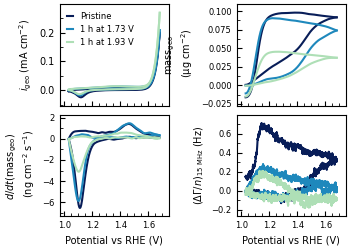

In [15]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib import cm
from scipy.ndimage import gaussian_filter1d

def convert_potential(E_old, pH=13, Eref_old = 0.165): 
    E_new = E_old + Eref_old + 0.059*pH
    return E_new


n_cycle = 3

def CalcSauerbreyMass(df_by_n: np.ndarray, Filter: bool = True) -> np.ndarray: 
    Zq = 8.8e6
    f0 = 5e6
    MassDensity = -df_by_n * Zq / (2*f0**2) * 1e5  # conversion of kg/m2 in ug/cm2
    return gaussian_filter1d(MassDensity, 150, axis=0) if Filter else MassDensity

def discard_points(y: np.ndarray, trsh: int) -> np.ndarray: 
    y[np.abs(y) > trsh] = np.nan
    return pd.Series(y).interpolate().to_numpy()



labels = ['Pristine', '1 h at 1.73 V', '1 h at 1.93 V']
lines  = ['-', '-', '-']

SelectedData = AllEQCMData_indexed[AllEQCMData_indexed['cycle'].isin([n_cycle])]
def sample_sort_key(s):
    if "initial" in s:
        return 0
    elif "at_0" in s:
        return 1
    elif "at_1" in s or "at_1V" in s:
        return 2
    else:
        return 3  # fallback

samples = set(SelectedData.index.get_level_values('fname'))
samples = sorted(samples, key=sample_sort_key)
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=[3.5,2.5], constrained_layout = True)
axs[0,0].tick_params(which='both', direction="in", labelsize=7)
def colors(i):
    colors = cm.YlGnBu_r((i)*90)#cm.PuRd_r((i)*90)
    return colors
for i_sample, sample in enumerate(samples):
    df = SelectedData.loc[(sample)]
    len_anodic_wave = len(df['df/n 3 (Hz)']) // 2

    # Plot current
    axs[0,0].plot(convert_potential(df['potential (V)'].iloc[:len_anodic_wave]), df['current (mA)'].iloc[:len_anodic_wave],
                       linestyle=lines[i_sample], color=colors(i = i_sample), alpha = 1, label=labels[i_sample])
    axs[0,0].plot(convert_potential(df['potential (V)'].iloc[len_anodic_wave:]), df['current (mA)'].iloc[len_anodic_wave:],
                       linestyle=lines[i_sample], color=colors(i = i_sample), alpha = 1)
axs[0,0].set_ylabel(r'$i_{\mathrm{geo}} \ \mathrm{(mA \ cm^{-2}})$', fontsize=7)

ovt_keys_f = [SelectedData.keys()[4::2][0]]
axs[0,1].tick_params(which='both', direction="in", labelsize=6)
for i_sample, sample in enumerate(samples):
    df = SelectedData.loc[(sample)]
    SauerbreyMass = CalcSauerbreyMass(df['df/n 3 (Hz)'] - df['df/n 3 (Hz)'].iloc[0])
    axs[0,1].plot(convert_potential(df['potential (V)'].iloc[:len_anodic_wave]), SauerbreyMass[:len_anodic_wave],
                    linestyle=lines[i_sample], color=colors(i = i_sample), alpha = 1)
    axs[0,1].plot(convert_potential(df['potential (V)'].iloc[len_anodic_wave:]), SauerbreyMass[len_anodic_wave:],
                    linestyle=lines[i_sample], color=colors(i = i_sample), alpha = 1)
axs[0,1].set_ylabel('$\mathrm{mass_{geo}}$ \n ($\mathrm{\mu g \ cm^{-2}}$)', fontsize=7)
axs[0,1].tick_params(which='both', labelsize=6, direction = 'in')



ovt_keys_g = [SelectedData.keys()[5::2][0]]
axs[1,1].tick_params(which='both', direction="in", labelsize=6)
for i_sample, sample in enumerate(samples):
    df = SelectedData.loc[(sample)]
    for i_ovt, ovt_key in enumerate(ovt_keys_g):
        axs[1,1].plot(convert_potential(df['potential (V)'].iloc[:len_anodic_wave]), (df[ovt_key] - df[ovt_key].iloc[0]).iloc[:len_anodic_wave],
                            linestyle=lines[i_sample], color=colors(i = i_sample), alpha = 1)
        axs[1,1].plot(convert_potential(df['potential (V)'].iloc[len_anodic_wave:]), (df[ovt_key] - df[ovt_key].iloc[0]).iloc[len_anodic_wave:],
                           linestyle=lines[i_sample], color=colors(i = i_sample), alpha = 1)

axs[1,1].set_ylabel(r'$(\Delta \Gamma/n)_{15 \ \mathrm{MHz}}$ (Hz)', fontsize=7)
axs[1,1].set_xlabel('Potential vs RHE (V)', fontsize=7)
axs[1,0].set_xlabel('Potential vs RHE (V)', fontsize=7)

axs[1,0].tick_params(which='both', direction="in", labelsize=6)
for i_sample, sample in enumerate(samples):
    df = SelectedData.loc[(sample)]
    SauerbreyMass = CalcSauerbreyMass(df['df/n 3 (Hz)'] - df['df/n 3 (Hz)'].iloc[0])
    time = df['time (s)'].to_numpy()
    rate = (np.roll(SauerbreyMass, -1) - SauerbreyMass) / (time[1] - time[0])*1000
    rate_clean = discard_points(rate[5:-5], 20)
    axs[1,0].plot(convert_potential(df['potential (V)'].iloc[5:-5].iloc[:len_anodic_wave]), rate_clean[:len_anodic_wave],
                       linestyle=lines[i_sample], color=colors(i = i_sample), alpha = 1)
    axs[1,0].plot(convert_potential(df['potential (V)'].iloc[5:-5].iloc[len_anodic_wave:]), rate_clean[len_anodic_wave:],
                       linestyle=lines[i_sample], color=colors(i = i_sample), alpha = 1)
axs[1,0].set_ylabel('$d/dt(\mathrm{mass_{geo}})$ \n ($\mathrm{ ng \ cm^{-2} \ s^{-1}}$)', fontsize=7)

for ax in np.ravel(axs):
    ax.margins(x=0.1, y=0.1)
    ax.set_xticks([1.0, 1.2, 1.4, 1.6])
    ax.yaxis.set_minor_locator(AutoMinorLocator(n = 2))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n = 4))
axs[0,0].legend( fontsize = 6, frameon = False, handlelength=0.75)
plt.savefig(fname=f"result_{n_cycle}_conditioning.tif", dpi=600, pil_kwargs={"compression": "tiff_lzw"}, bbox_inches='tight', transparent = True)
plt.show()

## Check the MPE
the differential MPE suffers from poles (devision by zero)

<>:51: SyntaxWarning: invalid escape sequence '\m'
<>:51: SyntaxWarning: invalid escape sequence '\m'
/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_1809/2569208193.py:51: SyntaxWarning: invalid escape sequence '\m'
  axs.set_ylabel('Mass per electron ($\mathrm{g \ mol^{-1}}$)', fontsize = 7)
/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_1809/2569208193.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rate = (np.roll(SauerbreyMass, -1) - SauerbreyMass) / (time[1] - time[0])/1000


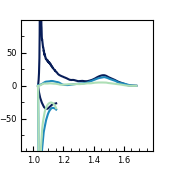

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

labels = ['Pristine', '1 h at 1.73 V', '1 h at 1.93 V']

def colors(i):
    colors = cm.YlGnBu_r((i)*90)#cm.PuRd_r((i)*90)
    return colors

def sample_sort_key(s):
    if "initial" in s:
        return 0
    elif "at_0" in s:
        return 1
    elif "at_1" in s or "at_1V" in s:
        return 2
    else:
        return 3  # fallback

samples = set(SelectedData.index.get_level_values('fname'))
samples = sorted(samples, key=sample_sort_key)

fig, axs = plt.subplots(figsize=[1.7,1.7])
for i_sample, sample in enumerate(samples):
    df = SelectedData.loc[(sample)]
    SauerbreyMass = CalcSauerbreyMass(df['df/n 3 (Hz)'] - df['df/n 3 (Hz)'].iloc[0])
    time = df['time (s)']

    rate = (np.roll(SauerbreyMass, -1) - SauerbreyMass) / (time[1] - time[0])/1000
    MPE = 96485 * rate / np.abs(df['current (mA)'] / 1.17)
    potential = df['potential (V)'].values

    # Identify the index of the turning point (max potential)
    turning_idx = np.argmax(potential)

    # Split forward and backward scan
    fwd_pot = potential[:turning_idx+1]
    fwd_MPE = MPE[:turning_idx+1]
    bwd_pot = potential[turning_idx:]
    bwd_MPE = MPE[turning_idx:]

    # Apply masking
    fwd_mask = fwd_pot >= 0.0  # Keep data from 0.14 V onward
    bwd_mask = (bwd_pot <= 0.22) & (bwd_pot >= 0.1)

    # Plot masked data
    axs.plot(convert_potential(fwd_pot[fwd_mask]), fwd_MPE[fwd_mask], color = colors(i_sample), label=f"{labels[i_sample]}")
    axs.plot(convert_potential(bwd_pot[bwd_mask]), bwd_MPE[bwd_mask], color = colors(i_sample))
axs.set_ylim(bottom = -99, top = 99)
axs.set_ylabel('Mass per electron ($\mathrm{g \ mol^{-1}}$)', fontsize = 7)
axs.tick_params(which='both', direction="in", labelsize=6)
for ax in np.ravel(axs):
    ax.margins(x=0.17, y=0.17)
axs.set_xlabel('Potential vs RHE (V)', fontsize=7)
ax.yaxis.set_minor_locator(AutoMinorLocator(n = 2))
ax.xaxis.set_minor_locator(AutoMinorLocator(n = 4))
fig.legend(bbox_to_anchor=(1, 0.5), loc="center left", ncol = 1, fontsize = 6, frameon = False)
plt.savefig(fname=f"MPE.tif", dpi=600, pil_kwargs={"compression": "tiff_lzw"}, bbox_inches='tight')
plt.show()


## Check Intercycle Variations

### Load the Data from File

In [17]:
import os 
import pandas as pd

def CalcSauerbreyMass(df_by_n: np.ndarray, Filter: bool = False) -> np.ndarray: 
    Zq = 8.8e6
    f0 = 5e6
    MassDensity = -df_by_n * Zq / (2*f0**2) * 1e5  # conversion of kg/m2 in ug/cm2
    return gaussian_filter1d(MassDensity, 150, axis=0) if Filter else MassDensity



InterCycleData = pd.DataFrame()
InterCycleFiles = []
root = os.getcwd()
if __name__ == "__main__":
    for dirpath, dirnames, filenames in os.walk(root):
        for file in filenames:
            if file.endswith('ResPars.txt'):#eqcm
                InterCycleFiles.append(os.path.join(dirpath, file))
print(InterCycleFiles)
f0 = 5e6
for InterCycleFile in InterCycleFiles: 
    data = pd.read_csv(InterCycleFile, sep = '\t')
    data['file'] = os.path.basename(InterCycleFile)
    data['n'] = (data['f [Hz]']/f0).astype(int) + 1
    data['info'] = data['file'].map(
    lambda idx: (
        'Pristine' if 'ini' in idx else
        '1 h at 1.73 V' if '0p8' in idx or 'at_0' in idx else
        '1 h at 1.93 V' if 'at_1' in idx else
        'unknown'
    )
)
    InterCycleData = pd.concat([InterCycleData, data])

InterCycleData.drop_duplicates(inplace = True)

ovts = list(set(InterCycleData['n']))
InterCycleChange = pd.DataFrame()
for ovt in ovts:
    InterCycleDataOvt = InterCycleData[InterCycleData['n'] == ovt]
    InterCycleDataOvt['Df by n [Hz]'] = (InterCycleDataOvt['f [Hz]'] - InterCycleDataOvt[InterCycleDataOvt['info'] == 'Pristine']['f [Hz]'])/ovt
    InterCycleDataOvt['DG by n [Hz]'] = (InterCycleDataOvt['G [Hz]'] - InterCycleDataOvt[InterCycleDataOvt['info'] == 'Pristine']['G [Hz]'])/ovt
    InterCycleChange = pd.concat([InterCycleChange, InterCycleDataOvt])

InterCycleChange['mass [ugcm-2]'] =  CalcSauerbreyMass(InterCycleChange['Df by n [Hz]'])
custom_order = ['Pristine', '1 h at 1.73 V', '1 h at 1.93 V']  # define your order
InterCycleChange['info'] = pd.Categorical(InterCycleChange['info'], categories=custom_order, ordered=True)
InterCycleChange = InterCycleChange.sort_values(by=['n', 'info'])  # optional: also sort by 'n'
InterCycleChange




['/Users/leppin/Documents/SYNC/People/Christian/Electroresponsivity_Co3O4/Folder_For_DataBase/FastEQCM-D/SmallLoadingRepeat1/pristine/2025-05-22 CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_seq1/CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_seq1_ResPars.txt', '/Users/leppin/Documents/SYNC/People/Christian/Electroresponsivity_Co3O4/Folder_For_DataBase/FastEQCM-D/SmallLoadingRepeat1/after_1930mV/2025-05-23 CL20250523_002_#6_Co3O4Nps_CV_5mVpers_after1h_CA_at_1p0V_MSE_eq_1p93V_RHE_seq1/CL20250523_002_#6_Co3O4Nps_CV_5mVpers_after1h_CA_at_1p0V_MSE_eq_1p93V_RHE_seq1_ResPars.txt', '/Users/leppin/Documents/SYNC/People/Christian/Electroresponsivity_Co3O4/Folder_For_DataBase/FastEQCM-D/SmallLoadingRepeat1/after_1730mV/2025-05-22 CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_CA_at_0p8V_MSE_eq_1p73V_RHE_seq1/CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_CA_at_0p8V_MSE_eq_1p73V_RHE_seq1_ResPars.txt']


/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_1809/1404128835.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  InterCycleDataOvt['Df by n [Hz]'] = (InterCycleDataOvt['f [Hz]'] - InterCycleDataOvt[InterCycleDataOvt['info'] == 'Pristine']['f [Hz]'])/ovt
/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_1809/1404128835.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  InterCycleDataOvt['DG by n [Hz]'] = (InterCycleDataOvt['G [Hz]'] - InterCycleDataOvt[InterCycleDataOvt['info'] == '

f [Hz]       G [Hz]  \
0  0.000000e+00     0.000000   
0  0.000000e+00     0.000000   
0  0.000000e+00     0.000000   
1  1.497238e+07  1301.529188   
1  1.497242e+07  1310.702190   
1  1.497245e+07  1337.960039   
2  2.494628e+07  1690.760655   
2  2.494634e+07  1703.114970   
2  2.494640e+07  1740.351693   
3  3.491896e+07  1957.357508   
3  3.491904e+07  1980.837299   
3  3.491912e+07  2026.152571   
4  4.489314e+07  2201.999611   
4  4.489326e+07  2219.951158   
4  4.489338e+07  2277.660322   

                                                file  n           info  \
0  CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_...  1       Pristine   
0  CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_...  1  1 h at 1.73 V   
0  CL20250523_002_#6_Co3O4Nps_CV_5mVpers_after1h_...  1  1 h at 1.93 V   
1  CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_...  3       Pristine   
1  CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_...  3  1 h at 1.73 V   
1  CL20250523_002_#6_Co3O4Nps_CV_5mVpers_after1h_...  3  1 h at 1.93 V   
2  CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_...  5       Pristine   
2  CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_...  5  1 h at 1.73 V   
2  CL20250523_002_#6_Co3O4Nps_CV_5mVpers_after1h_...  5  1 h at 1.93 V   
3  CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_...  7       Pristine   
3  CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_...  7  1 h at 1.73 V   
3  CL20250523_002_#6_Co3O4Nps_CV_5mVpers_after1h_...  7  1 h at 1.93 V   
4  CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_...  9       Pristine   
4  CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_...  9  1 h at 1.73 V   
4  CL20250523_002_#6_Co3O4Nps_CV_5mVpers_after1h_...  9  1 h at 1.93 V   

   Df by n [Hz]  DG by n [Hz]  mass [ugcm-2]  
0      0.000000      0.000000      -0.000000  
0      0.000000      0.000000      -0.000000  
0      0.000000      0.000000      -0.000000  
1      0.000000      0.000000      -0.000000  
1     13.288457      3.057668      -0.233877  
1     21.638735     12.143617      -0.380842  
2      0.000000      0.000000      -0.000000  
2     12.495291      2.470863      -0.219917  
2     23.977698      9.918208      -0.422007  
3      0.000000      0.000000      -0.000000  
3     11.316762      3.354256      -0.199175  
3     23.435325      9.827866      -0.412462  
4      0.000000      0.000000      -0.000000  
4     13.165798      1.994616      -0.231718  
4     26.151420      8.406746      -0.460265

### Make a Plot

<>:46: SyntaxWarning: invalid escape sequence '\D'
<>:47: SyntaxWarning: invalid escape sequence '\m'
<>:46: SyntaxWarning: invalid escape sequence '\D'
<>:47: SyntaxWarning: invalid escape sequence '\m'
/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_1809/1252200349.py:46: SyntaxWarning: invalid escape sequence '\D'
  axs.set_ylabel('$\Delta f/n, \Delta \Gamma /n$ (Hz)', fontsize=7)
/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_1809/1252200349.py:47: SyntaxWarning: invalid escape sequence '\m'
  sec_axs.set_ylabel('$\mathrm{mass_{geo}}$ ($\mathrm{\mu g \ cm^{-2}}$)', fontsize=6)


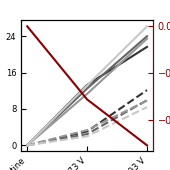

In [18]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib.cm as cm
from matplotlib.ticker import MaxNLocator

def colors(i, colorlist=cm.gray, increment=50):
    return colorlist(i * increment)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(1.7, 1.7))
ovts = set(InterCycleChange['n'])
axs.tick_params(which='both', direction='in', bottom=True, left=True, labelsize=6)
sec_axs = axs.twinx()

for iovt, ovt in enumerate(ovts):
    InterCycleChangeOvt = InterCycleChange[InterCycleChange['n'] == ovt]
    
    # Plot Δf/n if non-zero
    if (InterCycleChangeOvt['Df by n [Hz]'] != 0).any():
        axs.plot(
            InterCycleChangeOvt['info'],
            InterCycleChangeOvt['Df by n [Hz]'],
            color=colors(iovt),
            linestyle='-'
        )
    
    # Plot ΔΓ/n if non-zero
    if (InterCycleChangeOvt['DG by n [Hz]'] != 0).any():
        axs.plot(
            InterCycleChangeOvt['info'],
            InterCycleChangeOvt['DG by n [Hz]'],
            color=colors(iovt),
            linestyle='--'
        )
    
    # Plot mass only if ovt == 3 and values are non-zero
    if ovt == 3 and (InterCycleChangeOvt['mass [ugcm-2]'] != 0).any():
        sec_axs.plot(
            InterCycleChangeOvt['info'],
            InterCycleChangeOvt['mass [ugcm-2]'],
            color='darkred',
            linestyle='-'
        )

# Labels and axis formatting
axs.set_ylabel('$\Delta f/n, \Delta \Gamma /n$ (Hz)', fontsize=7)
sec_axs.set_ylabel('$\mathrm{mass_{geo}}$ ($\mathrm{\mu g \ cm^{-2}}$)', fontsize=6)
sec_axs.spines['right'].set_color('darkred')
sec_axs.yaxis.label.set_color('darkred')
sec_axs.tick_params(which='both', labelsize=7, labelright=True, colors='darkred', direction='in')
axs.yaxis.set_major_locator(MaxNLocator(nbins=4))
sec_axs.yaxis.set_major_locator(MaxNLocator(nbins=4))
axs.tick_params(axis='x', labelrotation=45)
for label in axs.get_xticklabels():
    label.set_horizontalalignment('right')

plt.savefig(fname=f"Intercycle_Variations.tif", dpi=600, pil_kwargs={"compression": "tiff_lzw"}, bbox_inches='tight', transparent = True)
plt.show()


In [19]:
InterCycleChangeOvt

f [Hz]       G [Hz]  \
4  4.489314e+07  2201.999611   
4  4.489326e+07  2219.951158   
4  4.489338e+07  2277.660322   

                                                file  n           info  \
4  CL20250522_006_#6_Co3O4Nps_CV_5mVpers_initial_...  9       Pristine   
4  CL20250522_006_#6_Co3O4Nps_CV_5mVpers_after1h_...  9  1 h at 1.73 V   
4  CL20250523_002_#6_Co3O4Nps_CV_5mVpers_after1h_...  9  1 h at 1.93 V   

   Df by n [Hz]  DG by n [Hz]  mass [ugcm-2]  
4      0.000000      0.000000      -0.000000  
4     13.165798      1.994616      -0.231718  
4     26.151420      8.406746      -0.460265